In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from cmocean import cm

import warnings
warnings.filterwarnings("ignore")

In [2]:
grid = xr.open_dataset('/data1/parker/LO_data/grids/cas7/grid.nc')

In [3]:
def calc_stats(x, y):
    stats = {}
    MSE = np.nanmean((y - x)**2)
    stats['RMSE'] = np.sqrt(MSE)
    stats['bias'] = np.nanmean(y) - np.nanmean(x)
    stats['WSS'] = 1 - MSE / np.nanmean((abs(y - np.nanmean(x)) + abs(x - np.nanmean(x)))**2)
    
    return stats

def plot_panel(ax, x, y, lims, units):
    stats = calc_stats(x, y)

    statstext = f"RMSE = {stats['RMSE']:.2f} {units}\nbias = {stats['bias']:.2f} {units}\nWSS = {stats['WSS']:.3f}"
    
    props = dict(boxstyle='round', facecolor='w', alpha=0.9)
    c = ax.text(0, 0.8, statstext, bbox=props, transform=ax.transAxes, fontsize=9)
    ax.set_xlim(lims)
    ax.set_ylim(lims)
    
    return c


In [4]:
# cas7 obsmod
# NOTE: cas7 is available from 2013-2024, but i'm only looking at 2017-2021 data here so that is can be directly compared to cas6

ctd2017 = pd.read_pickle('/data1/bbeutel/LO_output/obsmod/cas7_t0_x4b/multi_ctd_2017.p')
ctd2018 = pd.read_pickle('/data1/bbeutel/LO_output/obsmod/cas7_t0_x4b/multi_ctd_2018.p')
ctd2019 = pd.read_pickle('/data1/bbeutel/LO_output/obsmod/cas7_t0_x4b/multi_ctd_2019.p')
ctd2020 = pd.read_pickle('/data1/bbeutel/LO_output/obsmod/cas7_t0_x4b/multi_ctd_2020.p')
ctd2021 = pd.read_pickle('/data1/bbeutel/LO_output/obsmod/cas7_t0_x4b/multi_ctd_2021.p')

bot2017 = pd.read_pickle('/data1/bbeutel/LO_output/obsmod/cas7_t0_x4b/multi_bottle_2017.p')
bot2018 = pd.read_pickle('/data1/bbeutel/LO_output/obsmod/cas7_t0_x4b/multi_bottle_2018.p')
bot2019 = pd.read_pickle('/data1/bbeutel/LO_output/obsmod/cas7_t0_x4b/multi_bottle_2019.p')
bot2020 = pd.read_pickle('/data1/bbeutel/LO_output/obsmod/cas7_t0_x4b/multi_bottle_2020.p')
bot2021 = pd.read_pickle('/data1/bbeutel/LO_output/obsmod/cas7_t0_x4b/multi_bottle_2021.p')


obs7 = pd.concat([bot2017['obs'], bot2018['obs'], bot2019['obs'], bot2020['obs'], bot2021['obs']], ignore_index=True)
obs7.name = 'bottle' # so that we can differentiate between bottle and ctd casts from dfo just in case
obs7 = pd.concat([obs7,ctd2017['obs'], ctd2018['obs'], ctd2019['obs'], ctd2020['obs'],ctd2021['obs']], ignore_index=True)

mod7 = pd.concat([bot2017['cas7_t0_x4b'], bot2018['cas7_t0_x4b'],bot2019['cas7_t0_x4b'],bot2020['cas7_t0_x4b'],bot2021['cas7_t0_x4b']], ignore_index=True)
mod7.name = 'bottle' # so that we can differentiate between bottle and ctd casts from dfo just in case
mod7 = pd.concat([mod7,ctd2017['cas7_t0_x4b'], ctd2018['cas7_t0_x4b'], ctd2019['cas7_t0_x4b'],ctd2020['cas7_t0_x4b'],ctd2021['cas7_t0_x4b']], ignore_index=True)

In [9]:
# cas6 obsmod

ctd2017 = pd.read_pickle('/data1/bbeutel/LO_output/obsmod/cas6/multi_ctd_2017.p')
ctd2018 = pd.read_pickle('/data1/bbeutel/LO_output/obsmod/cas6/multi_ctd_2018.p')
ctd2019 = pd.read_pickle('/data1/bbeutel/LO_output/obsmod/cas6/multi_ctd_2019.p')
ctd2020 = pd.read_pickle('/data1/bbeutel/LO_output/obsmod/cas6/multi_ctd_2020.p')
ctd2021 = pd.read_pickle('/data1/bbeutel/LO_output/obsmod/cas6/multi_ctd_2021.p')

bot2017 = pd.read_pickle('/data1/bbeutel/LO_output/obsmod/cas6/multi_bottle_2017.p')
bot2018 = pd.read_pickle('/data1/bbeutel/LO_output/obsmod/cas6/multi_bottle_2018.p')
bot2019 = pd.read_pickle('/data1/bbeutel/LO_output/obsmod/cas6/multi_bottle_2019.p')
bot2020 = pd.read_pickle('/data1/bbeutel/LO_output/obsmod/cas6/multi_bottle_2020.p')
bot2021 = pd.read_pickle('/data1/bbeutel/LO_output/obsmod/cas6/multi_bottle_2021.p')


obs6 = pd.concat([bot2017['obs'], bot2018['obs'], bot2019['obs'], bot2020['obs'], bot2021['obs']], ignore_index=True)
obs6.name = 'bottle' # so that we can differentiate between bottle and ctd casts from dfo just in case
obs6 = pd.concat([obs6,ctd2017['obs'], ctd2018['obs'], ctd2019['obs'], ctd2020['obs'],ctd2021['obs']], ignore_index=True)

mod6 = pd.concat([bot2017['cas6_v0_live'], bot2018['cas6_v0_live'],bot2019['cas6_v0_live'], bot2020['cas6_v0_live'],bot2021['cas6_v0_live']], ignore_index=True)
mod6.name = 'bottle' # so that we can differentiate between bottle and ctd casts from dfo just in case
mod6 = pd.concat([mod6,ctd2017['cas6_v0_live'], ctd2018['cas6_v0_live'], ctd2019['cas6_v0_live'], ctd2020['cas6_v0_live'],ctd2021['cas6_v0_live']], ignore_index=True)

In [11]:
for obs in [obs6,obs7]:
    # remove all unreasonable DO values, based on calculated max DO
    obs.loc[obs['DO (uM)'] > 475, 'DO (uM)'] = pd.NA

    # remove negative NO3 and Chl
    obs.loc[obs['NO3 (uM)'] < 0, 'NO3 (uM)'] = pd.NA
    obs.loc[obs['Chl (mg m-3)'] < 0, 'Chl (mg m-3)'] = pd.NA


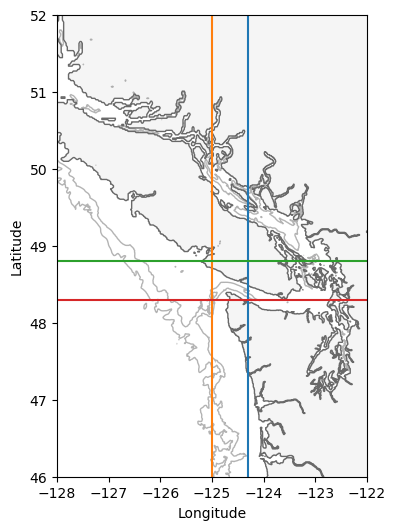

In [17]:
# decide on cuttoff for JdF mouth

grid = xr.open_dataset('/data1/parker/LO_data/grids/cas6/grid.nc')

fig, ax = plt.subplots(1,1,figsize=(4, 6))

ax.contourf(grid.lon_rho, grid.lat_rho, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='whitesmoke')
ax.contour(grid.lon_rho, grid.lat_rho, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray')
ax.contour(grid.lon_rho, grid.lat_rho,grid.h, linewidths=1, levels=[200, 1000], colors='dimgray', alpha=0.5)

ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_ylim([46,52])
ax.set_xlim([-128,-122])

east = -124.3
west = -125
north = 48.8
south = 48.3
# east cuttoff
ax.plot([east,east],[46,52])
# west cuttoff
ax.plot([west,west],[46,52])
#north cuttoff
ax.plot([-130,-122],[north,north])
# south cuttoff
ax.plot([-130,-122],[south,south])

In [22]:
#drop rows that aren't in this domain

obs6 = obs6[(obs6.lon >= west) & (obs6.lon <= east) & (obs6.lat >= south) & (obs6.lat <= north)]
obs7 = obs7[(obs7.lon >= west) & (obs7.lon <= east) & (obs7.lat >= south) & (obs7.lat <= north)]
mod6 = mod6[(mod6.lon >= west) & (mod6.lon <= east) & (mod6.lat >= south) & (mod6.lat <= north)]
mod7 = mod7[(mod7.lon >= west) & (mod7.lon <= east) & (mod7.lat >= south) & (mod7.lat <= north)]

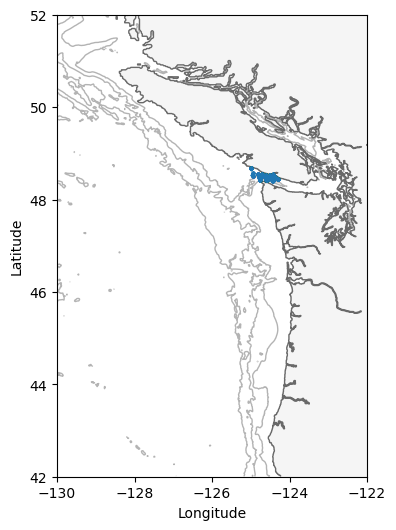

In [23]:
# quick visual check to see if seperated properly
fig, ax = plt.subplots(1,1,figsize=(4, 6))

ax.contourf(grid.lon_rho, grid.lat_rho, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='whitesmoke',zorder=1)
ax.contour(grid.lon_rho, grid.lat_rho, grid.mask_rho, linewidths=1, levels=[-0.01, 0.01], colors='dimgray', zorder=2)
ax.contour(grid.lon_rho, grid.lat_rho,grid.h, linewidths=1, levels=[200, 1000, 2000], colors='dimgray', alpha=0.5, zorder=0)
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_ylim([42,52])
ax.set_xlim([-130,-122])


# plot the location of observations
ax.scatter(obs6.lon, obs6.lat, s=2, label="offshore",zorder=4)

# Observations versus model

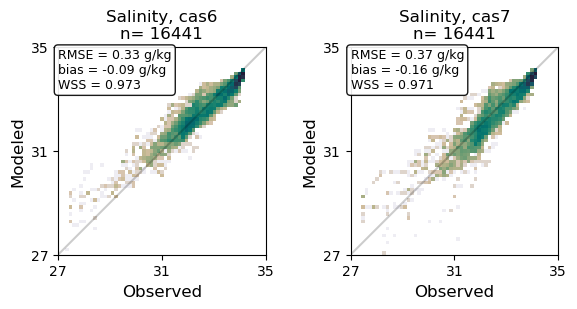

In [36]:
# evals of salinity by region
vmin, vmax = 27, 35
bin = np.linspace(vmin,vmax,60)

cmap = cm.rain
fig, ax = plt.subplots(1, 2, figsize = (6, 3)) 

# first cas 6
obs = obs6
mod = mod6
ax[0].plot((vmin,vmax),(vmin,vmax),'k-',alpha=.2)

iiS=(~np.isnan(obs.SA))&(~np.isnan(mod.SA))

counts, xedges, yedges, m2=ax[0].hist2d(obs.loc[iiS,['SA']].values.flatten(),
                            mod.loc[iiS,['SA']].values.flatten(),bins=bin,norm=LogNorm(),cmap=cmap)

ntick=np.linspace(27, 35, 3)
ax[0].set_xlim((27,35))
ax[0].set_ylim((27,35))
ax[0].set_xticks(ntick)
ax[0].set_yticks(ntick)
        
ax[0].set_aspect(1, adjustable='box')
ax[0].set_ylabel('Modeled',fontsize=12)
ax[0].set_xlabel('Observed',fontsize=12)

title = 'Salinity, cas6'+'\nn= '+str(np.count_nonzero(~np.isnan(obs.SA)))
ax[0].set_title(title,fontsize=12)

# plot the stats pannel
plot_panel(ax[0], obs['SA'], mod['SA'], (27,35), 'g/kg')


# and cas7
obs = obs7
mod = mod7
ax[1].plot((vmin,vmax),(vmin,vmax),'k-',alpha=.2)

iiS=(~np.isnan(obs.SA))&(~np.isnan(mod.SA))

counts, xedges, yedges, m2=ax[1].hist2d(obs.loc[iiS,['SA']].values.flatten(),
                            mod.loc[iiS,['SA']].values.flatten(),bins=bin,norm=LogNorm(),cmap=cmap)

ntick=np.linspace(27, 35, 3)
ax[1].set_xlim((27,35))
ax[1].set_ylim((27,35))
ax[1].set_xticks(ntick)
ax[1].set_yticks(ntick)
        
ax[1].set_aspect(1, adjustable='box')
ax[1].set_ylabel('Modeled',fontsize=12)
ax[1].set_xlabel('Observed',fontsize=12)

title = 'Salinity, cas7'+'\nn= '+str(np.count_nonzero(~np.isnan(obs.SA)))
ax[1].set_title(title,fontsize=12)

# plot the stats pannel
plot_panel(ax[1], obs['SA'], mod['SA'], (27,35), 'g/kg')

plt.tight_layout()


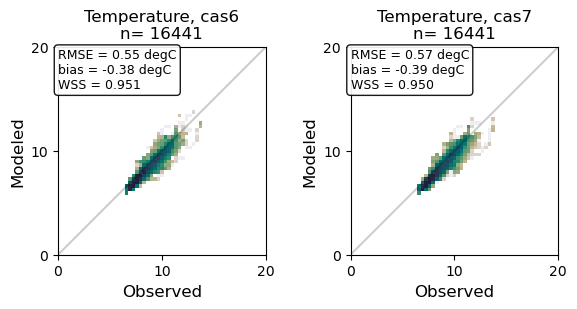

In [35]:
# evals of temperature by region
vmin, vmax = 0, 20
bin = np.linspace(vmin,vmax,60)

cmap = cm.rain

fig, ax = plt.subplots(1, 2, figsize = (6, 3)) 

# first cas 6
obs = obs6
mod = mod6
ax[0].plot((vmin,vmax),(vmin,vmax),'k-',alpha=.2)

iiS=(~np.isnan(obs.CT))&(~np.isnan(mod.CT))

counts, xedges, yedges, m2=ax[0].hist2d(obs.loc[iiS,['CT']].values.flatten(),
                            mod.loc[iiS,['CT']].values.flatten(),bins=bin,norm=LogNorm(),cmap=cmap)

ntick=np.linspace(vmin,vmax, 3)
ax[0].set_xlim((vmin,vmax))
ax[0].set_ylim((vmin,vmax))
ax[0].set_xticks(ntick)
ax[0].set_yticks(ntick)
        
ax[0].set_aspect(1, adjustable='box')
ax[0].set_ylabel('Modeled',fontsize=12)
ax[0].set_xlabel('Observed',fontsize=12)

title = 'Temperature, cas6'+'\nn= '+str(np.count_nonzero(~np.isnan(obs.CT)))
ax[0].set_title(title,fontsize=12)

# plot the stats pannel
plot_panel(ax[0], obs['CT'], mod['CT'], (vmin,vmax), 'degC')


# and cas7
obs = obs7
mod = mod7
ax[1].plot((vmin,vmax),(vmin,vmax),'k-',alpha=.2)

iiS=(~np.isnan(obs.CT))&(~np.isnan(mod.CT))

counts, xedges, yedges, m2=ax[1].hist2d(obs.loc[iiS,['CT']].values.flatten(),
                            mod.loc[iiS,['CT']].values.flatten(),bins=bin,norm=LogNorm(),cmap=cmap)

ntick=np.linspace(vmin,vmax, 3)
ax[1].set_xlim((vmin,vmax))
ax[1].set_ylim((vmin,vmax))
ax[1].set_xticks(ntick)
ax[1].set_yticks(ntick)
        
ax[1].set_aspect(1, adjustable='box')
ax[1].set_ylabel('Modeled',fontsize=12)
ax[1].set_xlabel('Observed',fontsize=12)

title = 'Temperature, cas7'+'\nn= '+str(np.count_nonzero(~np.isnan(obs.CT)))
ax[1].set_title(title,fontsize=12)

# plot the stats pannel
plot_panel(ax[1], obs['CT'], mod['CT'], (vmin,vmax), 'degC')

plt.tight_layout()


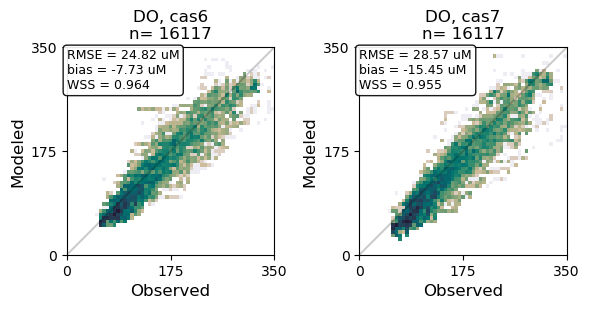

In [37]:
# evals of DO by region
vmin, vmax = 0, 350
bin = np.linspace(vmin,vmax,60)


cmap = cm.rain

fig, ax = plt.subplots(1, 2, figsize = (6, 3)) 

# first cas 6
obs = obs6
mod = mod6
ax[0].plot((vmin,vmax),(vmin,vmax),'k-',alpha=.2)

iiS=(~np.isnan(obs['DO (uM)']))&(~np.isnan(mod['DO (uM)']))

counts, xedges, yedges, m2=ax[0].hist2d(obs.loc[iiS,['DO (uM)']].values.flatten(),
                            mod.loc[iiS,['DO (uM)']].values.flatten(),bins=bin,norm=LogNorm(),cmap=cmap)

ntick=np.linspace(vmin,vmax, 3)
ax[0].set_xlim((vmin,vmax))
ax[0].set_ylim((vmin,vmax))
ax[0].set_xticks(ntick)
ax[0].set_yticks(ntick)
        
ax[0].set_aspect(1, adjustable='box')
ax[0].set_ylabel('Modeled',fontsize=12)
ax[0].set_xlabel('Observed',fontsize=12)

title = 'DO, cas6'+'\nn= '+str(np.count_nonzero(~np.isnan(obs['DO (uM)'])))
ax[0].set_title(title,fontsize=12)

# plot the stats pannel
plot_panel(ax[0], obs['DO (uM)'], mod['DO (uM)'], (vmin,vmax), 'uM')


# and cas7
obs = obs7
mod = mod7
ax[1].plot((vmin,vmax),(vmin,vmax),'k-',alpha=.2)

iiS=(~np.isnan(obs['DO (uM)']))&(~np.isnan(mod['DO (uM)']))

counts, xedges, yedges, m2=ax[1].hist2d(obs.loc[iiS,['DO (uM)']].values.flatten(),
                            mod.loc[iiS,['DO (uM)']].values.flatten(),bins=bin,norm=LogNorm(),cmap=cmap)

ntick=np.linspace(vmin,vmax, 3)
ax[1].set_xlim((vmin,vmax))
ax[1].set_ylim((vmin,vmax))
ax[1].set_xticks(ntick)
ax[1].set_yticks(ntick)
        
ax[1].set_aspect(1, adjustable='box')
ax[1].set_ylabel('Modeled',fontsize=12)
ax[1].set_xlabel('Observed',fontsize=12)

title = 'DO, cas7'+'\nn= '+str(np.count_nonzero(~np.isnan(obs['DO (uM)'])))
ax[1].set_title(title,fontsize=12)

# plot the stats pannel
plot_panel(ax[1], obs['DO (uM)'], mod['DO (uM)'], (vmin,vmax), 'uM')

plt.tight_layout()


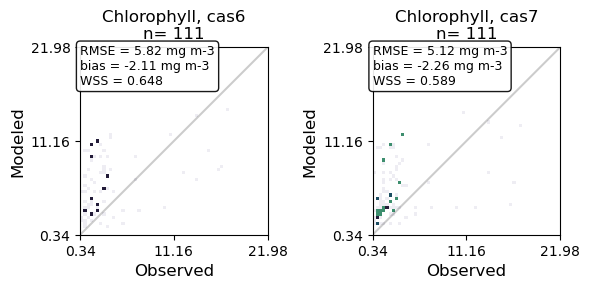

In [39]:
# evals of Chl
tracer = 'Chl (mg m-3)'
vmin, vmax = np.min(obs[tracer]), np.max(obs[tracer])*0.5
bin = np.linspace(vmin,vmax,60)

cmap = cm.rain

fig, ax = plt.subplots(1, 2, figsize = (6, 3)) 

# first cas 6
obs = obs6
mod = mod6
ax[0].plot((vmin,vmax),(vmin,vmax),'k-',alpha=.2)

iiS=(~np.isnan(obs[tracer]))&(~np.isnan(mod[tracer]))

counts, xedges, yedges, m2=ax[0].hist2d(obs.loc[iiS,[tracer]].values.flatten(),
                            mod.loc[iiS,[tracer]].values.flatten(),bins=bin,norm=LogNorm(),cmap=cmap)

ntick=np.linspace(vmin,vmax, 3)
ax[0].set_xlim((vmin,vmax))
ax[0].set_ylim((vmin,vmax))
ax[0].set_xticks(ntick)
ax[0].set_yticks(ntick)
        
ax[0].set_aspect(1, adjustable='box')
ax[0].set_ylabel('Modeled',fontsize=12)
ax[0].set_xlabel('Observed',fontsize=12)

title = 'Chlorophyll, cas6'+'\nn= '+str(np.count_nonzero(~np.isnan(obs[tracer])))
ax[0].set_title(title,fontsize=12)

# plot the stats pannel
plot_panel(ax[0], obs[tracer], mod[tracer], (vmin,vmax), 'mg m-3')


# and cas7
obs = obs7
mod = mod7
ax[1].plot((vmin,vmax),(vmin,vmax),'k-',alpha=.2)

iiS=(~np.isnan(obs[tracer]))&(~np.isnan(mod[tracer]))

counts, xedges, yedges, m2=ax[1].hist2d(obs.loc[iiS,[tracer]].values.flatten(),
                            mod.loc[iiS,[tracer]].values.flatten(),bins=bin,norm=LogNorm(),cmap=cmap)

ntick=np.linspace(vmin,vmax, 3)
ax[1].set_xlim((vmin,vmax))
ax[1].set_ylim((vmin,vmax))
ax[1].set_xticks(ntick)
ax[1].set_yticks(ntick)
        
ax[1].set_aspect(1, adjustable='box')
ax[1].set_ylabel('Modeled',fontsize=12)
ax[1].set_xlabel('Observed',fontsize=12)

title = 'Chlorophyll, cas7'+'\nn= '+str(np.count_nonzero(~np.isnan(obs[tracer])))
ax[1].set_title(title,fontsize=12)

# plot the stats pannel
plot_panel(ax[1], obs[tracer], mod[tracer], (vmin,vmax), 'mg m-3')

plt.tight_layout()



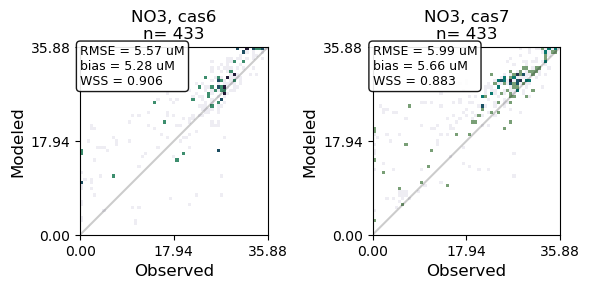

In [40]:
# evals of NO3
tracer = 'NO3 (uM)'
vmin, vmax = np.min(obs[tracer]), np.max(obs[tracer])
bin = np.linspace(vmin,vmax,60)

cmap = cm.rain

fig, ax = plt.subplots(1, 2, figsize = (6, 3)) 

# first cas 6
obs = obs6
mod = mod6
ax[0].plot((vmin,vmax),(vmin,vmax),'k-',alpha=.2)

iiS=(~np.isnan(obs[tracer]))&(~np.isnan(mod[tracer]))

counts, xedges, yedges, m2=ax[0].hist2d(obs.loc[iiS,[tracer]].values.flatten(),
                            mod.loc[iiS,[tracer]].values.flatten(),bins=bin,norm=LogNorm(),cmap=cmap)

ntick=np.linspace(vmin,vmax, 3)
ax[0].set_xlim((vmin,vmax))
ax[0].set_ylim((vmin,vmax))
ax[0].set_xticks(ntick)
ax[0].set_yticks(ntick)
        
ax[0].set_aspect(1, adjustable='box')
ax[0].set_ylabel('Modeled',fontsize=12)
ax[0].set_xlabel('Observed',fontsize=12)

title = 'NO3, cas6'+'\nn= '+str(np.count_nonzero(~np.isnan(obs[tracer])))
ax[0].set_title(title,fontsize=12)

# plot the stats pannel
plot_panel(ax[0], obs[tracer], mod[tracer], (vmin,vmax), 'uM')


# and cas7
obs = obs7
mod = mod7
ax[1].plot((vmin,vmax),(vmin,vmax),'k-',alpha=.2)

iiS=(~np.isnan(obs[tracer]))&(~np.isnan(mod[tracer]))

counts, xedges, yedges, m2=ax[1].hist2d(obs.loc[iiS,[tracer]].values.flatten(),
                            mod.loc[iiS,[tracer]].values.flatten(),bins=bin,norm=LogNorm(),cmap=cmap)

ntick=np.linspace(vmin,vmax, 3)
ax[1].set_xlim((vmin,vmax))
ax[1].set_ylim((vmin,vmax))
ax[1].set_xticks(ntick)
ax[1].set_yticks(ntick)
        
ax[1].set_aspect(1, adjustable='box')
ax[1].set_ylabel('Modeled',fontsize=12)
ax[1].set_xlabel('Observed',fontsize=12)

title = 'NO3, cas7'+'\nn= '+str(np.count_nonzero(~np.isnan(obs[tracer])))
ax[1].set_title(title,fontsize=12)

# plot the stats pannel
plot_panel(ax[1], obs[tracer], mod[tracer], (vmin,vmax), 'uM')

plt.tight_layout()

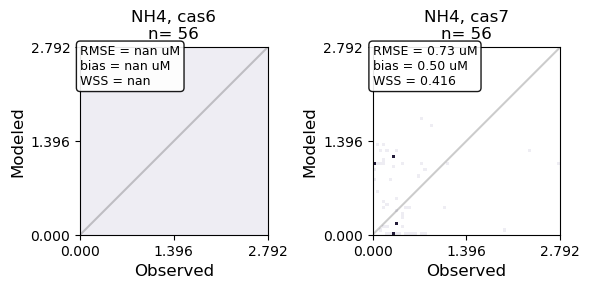

In [42]:
# evals of NH4
tracer = 'NH4 (uM)'
vmin, vmax = np.min(obs[tracer]), np.max(obs[tracer])
bin = np.linspace(vmin,vmax,60)

cmap = cm.rain

fig, ax = plt.subplots(1, 2, figsize = (6, 3)) 

# first cas 6
obs = obs6
mod = mod6
ax[0].plot((vmin,vmax),(vmin,vmax),'k-',alpha=.2)

iiS=(~np.isnan(obs[tracer]))&(~np.isnan(mod[tracer]))

counts, xedges, yedges, m2=ax[0].hist2d(obs.loc[iiS,[tracer]].values.flatten(),
                            mod.loc[iiS,[tracer]].values.flatten(),bins=bin,norm=LogNorm(),cmap=cmap)

ntick=np.linspace(vmin,vmax, 3)
ax[0].set_xlim((vmin,vmax))
ax[0].set_ylim((vmin,vmax))
ax[0].set_xticks(ntick)
ax[0].set_yticks(ntick)
        
ax[0].set_aspect(1, adjustable='box')
ax[0].set_ylabel('Modeled',fontsize=12)
ax[0].set_xlabel('Observed',fontsize=12)

title = 'NH4, cas6'+'\nn= '+str(np.count_nonzero(~np.isnan(obs[tracer])))
ax[0].set_title(title,fontsize=12)

# plot the stats pannel
plot_panel(ax[0], obs[tracer], mod[tracer], (vmin,vmax), 'uM')


# and cas7
obs = obs7
mod = mod7
ax[1].plot((vmin,vmax),(vmin,vmax),'k-',alpha=.2)

iiS=(~np.isnan(obs[tracer]))&(~np.isnan(mod[tracer]))

counts, xedges, yedges, m2=ax[1].hist2d(obs.loc[iiS,[tracer]].values.flatten(),
                            mod.loc[iiS,[tracer]].values.flatten(),bins=bin,norm=LogNorm(),cmap=cmap)

ntick=np.linspace(vmin,vmax, 3)
ax[1].set_xlim((vmin,vmax))
ax[1].set_ylim((vmin,vmax))
ax[1].set_xticks(ntick)
ax[1].set_yticks(ntick)
        
ax[1].set_aspect(1, adjustable='box')
ax[1].set_ylabel('Modeled',fontsize=12)
ax[1].set_xlabel('Observed',fontsize=12)

title = 'NH4, cas7'+'\nn= '+str(np.count_nonzero(~np.isnan(obs[tracer])))
ax[1].set_title(title,fontsize=12)

# plot the stats pannel
plot_panel(ax[1], obs[tracer], mod[tracer], (vmin,vmax), 'uM')

plt.tight_layout()

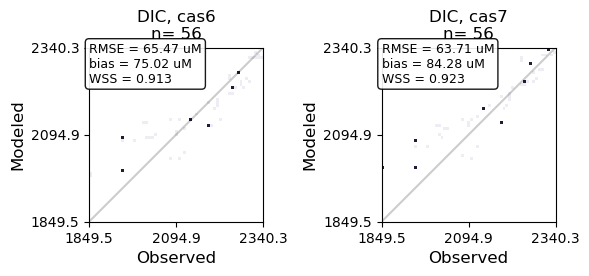

In [43]:
# evals of DIC
tracer = 'DIC (uM)'
vmin, vmax = np.min(obs[tracer]), np.max(obs[tracer])
bin = np.linspace(vmin,vmax,60)

cmap = cm.rain

fig, ax = plt.subplots(1, 2, figsize = (6, 3)) 

# first cas 6
obs = obs6
mod = mod6
ax[0].plot((vmin,vmax),(vmin,vmax),'k-',alpha=.2)

iiS=(~np.isnan(obs[tracer]))&(~np.isnan(mod[tracer]))

counts, xedges, yedges, m2=ax[0].hist2d(obs.loc[iiS,[tracer]].values.flatten(),
                            mod.loc[iiS,[tracer]].values.flatten(),bins=bin,norm=LogNorm(),cmap=cmap)

ntick=np.linspace(vmin,vmax, 3)
ax[0].set_xlim((vmin,vmax))
ax[0].set_ylim((vmin,vmax))
ax[0].set_xticks(ntick)
ax[0].set_yticks(ntick)
        
ax[0].set_aspect(1, adjustable='box')
ax[0].set_ylabel('Modeled',fontsize=12)
ax[0].set_xlabel('Observed',fontsize=12)

title = 'DIC, cas6'+'\nn= '+str(np.count_nonzero(~np.isnan(obs[tracer])))
ax[0].set_title(title,fontsize=12)

# plot the stats pannel
plot_panel(ax[0], obs[tracer], mod[tracer], (vmin,vmax), 'uM')


# and cas7
obs = obs7
mod = mod7
ax[1].plot((vmin,vmax),(vmin,vmax),'k-',alpha=.2)

iiS=(~np.isnan(obs[tracer]))&(~np.isnan(mod[tracer]))

counts, xedges, yedges, m2=ax[1].hist2d(obs.loc[iiS,[tracer]].values.flatten(),
                            mod.loc[iiS,[tracer]].values.flatten(),bins=bin,norm=LogNorm(),cmap=cmap)

ntick=np.linspace(vmin,vmax, 3)
ax[1].set_xlim((vmin,vmax))
ax[1].set_ylim((vmin,vmax))
ax[1].set_xticks(ntick)
ax[1].set_yticks(ntick)
        
ax[1].set_aspect(1, adjustable='box')
ax[1].set_ylabel('Modeled',fontsize=12)
ax[1].set_xlabel('Observed',fontsize=12)

title = 'DIC, cas7'+'\nn= '+str(np.count_nonzero(~np.isnan(obs[tracer])))
ax[1].set_title(title,fontsize=12)

# plot the stats pannel
plot_panel(ax[1], obs[tracer], mod[tracer], (vmin,vmax), 'uM')

plt.tight_layout()